Importing Libraries

In [126]:
import sys
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt # plotting
import numpy as np # linear algebra
import seaborn as sns
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)'

Reading and creating a Dataframe using a csv file

In [127]:
payments = pd.read_csv("C:/Users/16476/Documents/Courses/CIND_820_Project/archive_Online_Payments_Fraud_detection_datasets/PS_20174392719_1491204439457_log.csv")

To see the data

In [128]:
payments.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


Datatypes of the Dataframe

In [145]:
payments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


Dimentionality of the Dataframe

In [130]:
f"Transaction Dataset have {payments.shape[0]} rows and {payments.shape[1]} features."

'Transaction Dataset have 6362620 rows and 11 features.'

Missing values and percentage calculations

In [152]:
pd.DataFrame(zip(payments.columns,
                 payments.isna().any(),
                (payments.isna().sum() / payments.shape[0]) * 100),
             columns=['Column', 'Has Missing Values?', '% Missing Values'])\
    .sort_values('% Missing Values', ascending=False)

,Column,Has Missing Values?,% Missing Values
0,step,False,0.0
1,type,False,0.0
2,amount,False,0.0
3,nameOrig,False,0.0
4,oldbalanceOrg,False,0.0
5,newbalanceOrig,False,0.0
6,nameDest,False,0.0
7,oldbalanceDest,False,0.0
8,newbalanceDest,False,0.0
9,isFraud,False,0.0


Descrition of Data

In [132]:
payments.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


Boxplot of Numeric variables

BoxPlot of numeric variables


<AxesSubplot:>

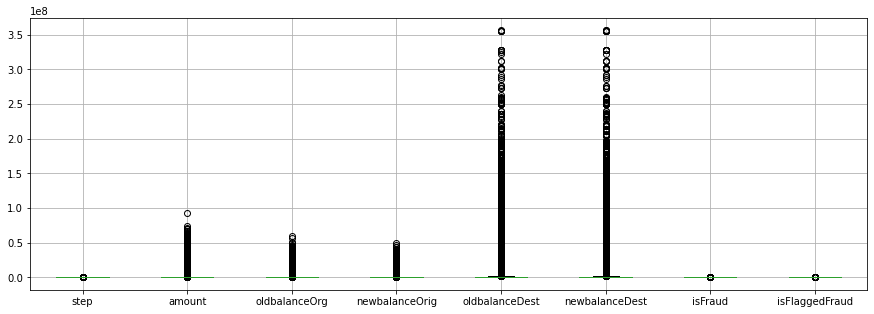

In [147]:
print("BoxPlot of numeric variables")
plot = payments.boxplot(column= ['step', 'amount', 'oldbalanceOrg','newbalanceOrig', 'oldbalanceDest', 'newbalanceDest','isFraud', 'isFlaggedFraud'],figsize=(15, 5))

Correlation heatmap between the Variables

Text(0.5, 1, 'Pearson correlation of Features')


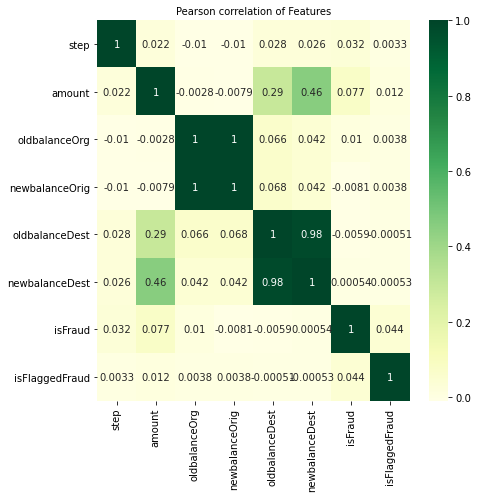

In [151]:
corr = payments.corr()

f, ax = plt.subplots(figsize=(7,7))
cmap = sns.diverging_palette(220, 10,  as_cmap=True)
_ = sns.heatmap(corr, cmap="YlGn", ax=ax, annot=True)

print(plt.title("Pearson correlation of Features", y=1, size=10))

plt.show()

Frequency Distribution of Transaction types

C:\Users\16476\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


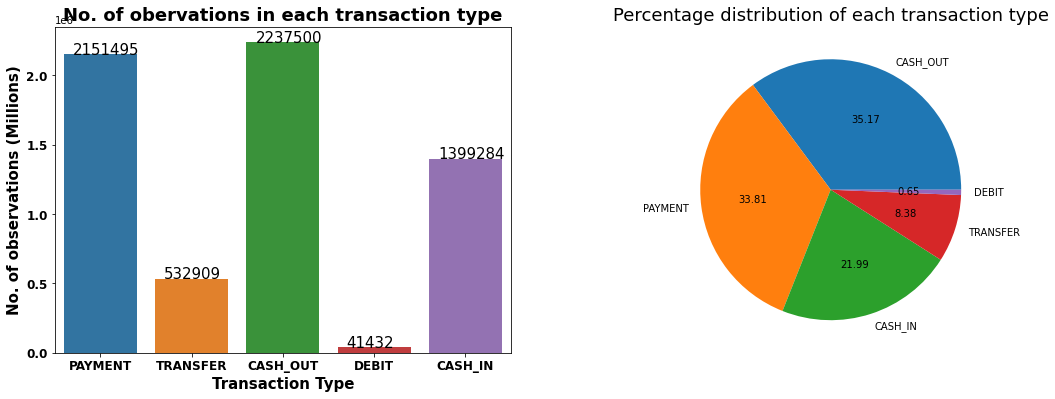

In [153]:
# transaction type
plt.subplots(1,2, figsize=(18,6))

# countplot to visualize the no. of observations under each class
plt.subplot(1,2,1)
ax = sns.countplot(payments['type'])
plt.xlabel('Transaction Type', fontsize=15, fontweight='bold')
plt.xticks(fontsize=12, fontweight='bold')
plt.ylabel('No. of observations (Millions)', fontsize=15, fontweight='bold')
plt.yticks(fontsize=12, fontweight='bold')
plt.title('No. of obervations in each transaction type', fontsize=18, fontweight='bold')
for i in ax.patches:
    # get_x pulls left or right; get_height pushes up or down
    ax.text(i.get_x()+0.1, i.get_height(), str(round(i.get_height(), 2)), fontsize=15, color='black')

# pie chart to visualize the percentage distribution of each class
plt.subplot(1,2,2)
plt.pie(payments['type'].value_counts(), labels=['CASH_OUT','PAYMENT','CASH_IN','TRANSFER','DEBIT'], autopct='%.2f')
plt.title('Percentage distribution of each transaction type', fontsize=18)

# display plot
plt.show()

Frequency distribution with respect to IsFraud class

In [154]:
pd.crosstab(payments.type, payments.isFraud)

isFraud,0,1
type,,
CASH_IN,1399284,0
CASH_OUT,2233384,4116
DEBIT,41432,0
PAYMENT,2151495,0
TRANSFER,528812,4097


Understanding the Type of Interaction/Transaction

In [155]:
# transaction type
payments['transactionBetween'] = payments['nameDest'].apply(lambda x: 'Customer2Customer' if x[0] == "C" else 'Customer2Merchant')

Frequency distribution of Interaction types and with respect to isFraud Class

C:\Users\16476\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


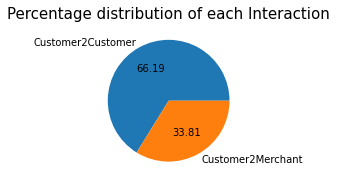

isFraud,0,1
transactionBetween,,
Customer2Customer,4202912,8213
Customer2Merchant,2151495,0


In [156]:
tb = sns.countplot(payments['transactionBetween'])
for i in tb.patches:
    # get_x pulls left or right; get_height pushes up or down
    tb.text(i.get_x()+0.1, i.get_height(), str(round(i.get_height(), 2)), fontsize=15, color='black')

plt.subplot(1,2,2)
plt.pie(payments['transactionBetween'].value_counts(), labels=['Customer2Customer','Customer2Merchant'], autopct='%.2f')
plt.title('Percentage distribution of each Interaction', fontsize=15)

# display plot
plt.show()
pd.crosstab(payments.transactionBetween, payments.isFraud)